<a href="https://colab.research.google.com/github/FernandoBRdgz/inteligencia_artificial/blob/main/detecci%C3%B3n_de_objetos/yolov8_entrenamiento_personalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detección de Objetos en Conjunto de Datos Personalizado

**Objetivo:**


### Introducción

El modelo YOLOv8 está diseñado para ser rápido, preciso y fácil de usar, lo que lo convierte en una excelente opción para una amplia gama de tareas de detección de objetos y segmentación de imágenes. Se puede entrenar en grandes conjuntos de datos y es capaz de ejecutarse en una variedad de plataformas de hardware.

**Historia**

* YOLO (You Only Look Once) es un popular modelo de segmentación de imágenes y detección de objetos desarrollado por Joseph Redmon y Ali Farhadi en la Universidad de Washington. La primera versión de YOLO se lanzó en 2015 y ganó popularidad rápidamente debido a su alta velocidad y precisión.

* YOLOv2 se lanzó en 2016 y mejoró el modelo original al incorporar normalización por lotes (*batch normalization*), cuadros de anclaje (*anchor boxes*) y clusters de dimensiones.

* YOLOv3 se lanzó en 2018 y mejoró aún más el rendimiento del modelo mediante el uso de una red espinal (*backbone network*) más eficiente, agregando una pirámide de características y haciendo uso de la pérdida focal (*focal loss*).

* En 2020, se lanzó YOLOv4, que introdujo una serie de innovaciones, como el uso del aumento de datos Mosaico (*Mosaic data augmentation*), un nuevo cabezal de detección sin anclaje (*anchor-free detection head*) y una nueva función de pérdida.

* En 2021, Ultralytics lanzó YOLOv5, que mejoró aún más el rendimiento del modelo y agregó nuevas funciones, como la compatibilidad con la segmentación panóptica (*panoptic segmentation*) y el seguimiento de objetos (*object tracking*).

* 2023, YOLOv8 es la última versión del modelo desarrollado por Ultralytics. Es un modelo de última generación que se basa en el éxito de las versiones anteriores e introduce nuevas características y mejoras para aumentar aún más el rendimiento y la flexibilidad. Una característica clave de YOLOv8 es su extensibilidad pues está diseñado como un marco que admite todas las versiones anteriores de YOLO, lo que facilita cambiar entre diferentes versiones y comparar su rendimiento. Además de su extensibilidad, YOLOv8 incluye una serie de otras innovaciones que incluyen un nuevo *backbone*, un nuevo cabezal de detección sin anclaje y una nueva función de pérdida.

#### Antes de iniciar

Es importante corroborar que se cuente con acceso a una GPU. Para ello se puede utilizar el comando `nvidia-smi`.

In [1]:
!nvidia-smi

Sat Feb 11 00:53:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Instalación

YOLOv8 se puede instalar de dos maneras. Utilizando pip o alternativamente, clonando directamente el repositorio.

In [3]:
# Método de instalación con pip (recomendado)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/166.8 GB disk)


In [4]:
# Método de clonación de repositorio

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

### Inferencia con el modelo preentrenado en el conjunto de datos COCO (common objects in context)

#### CLI (interfaz de línea de comandos)

`yolo mode=predict` ejecuta la inferencia de YOLOv8 en una variedad de fuentes, descarga los modelos automáticamente desde la última versión de YOLOv8 y guarda los resultados en `runs/predict`.

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://pixnio.com/free-images/2017/04/10/2017-04-10-07-10-35.jpg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 13.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 464k/464k [00:00<00:00, 908kB/s] 
image 1/1 /content/2017-04-10-07-10-35.jpg: 448x640 10 persons, 2 handbags, 15.1ms
Speed: 0.6ms pre-process, 15.1ms inference, 44.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


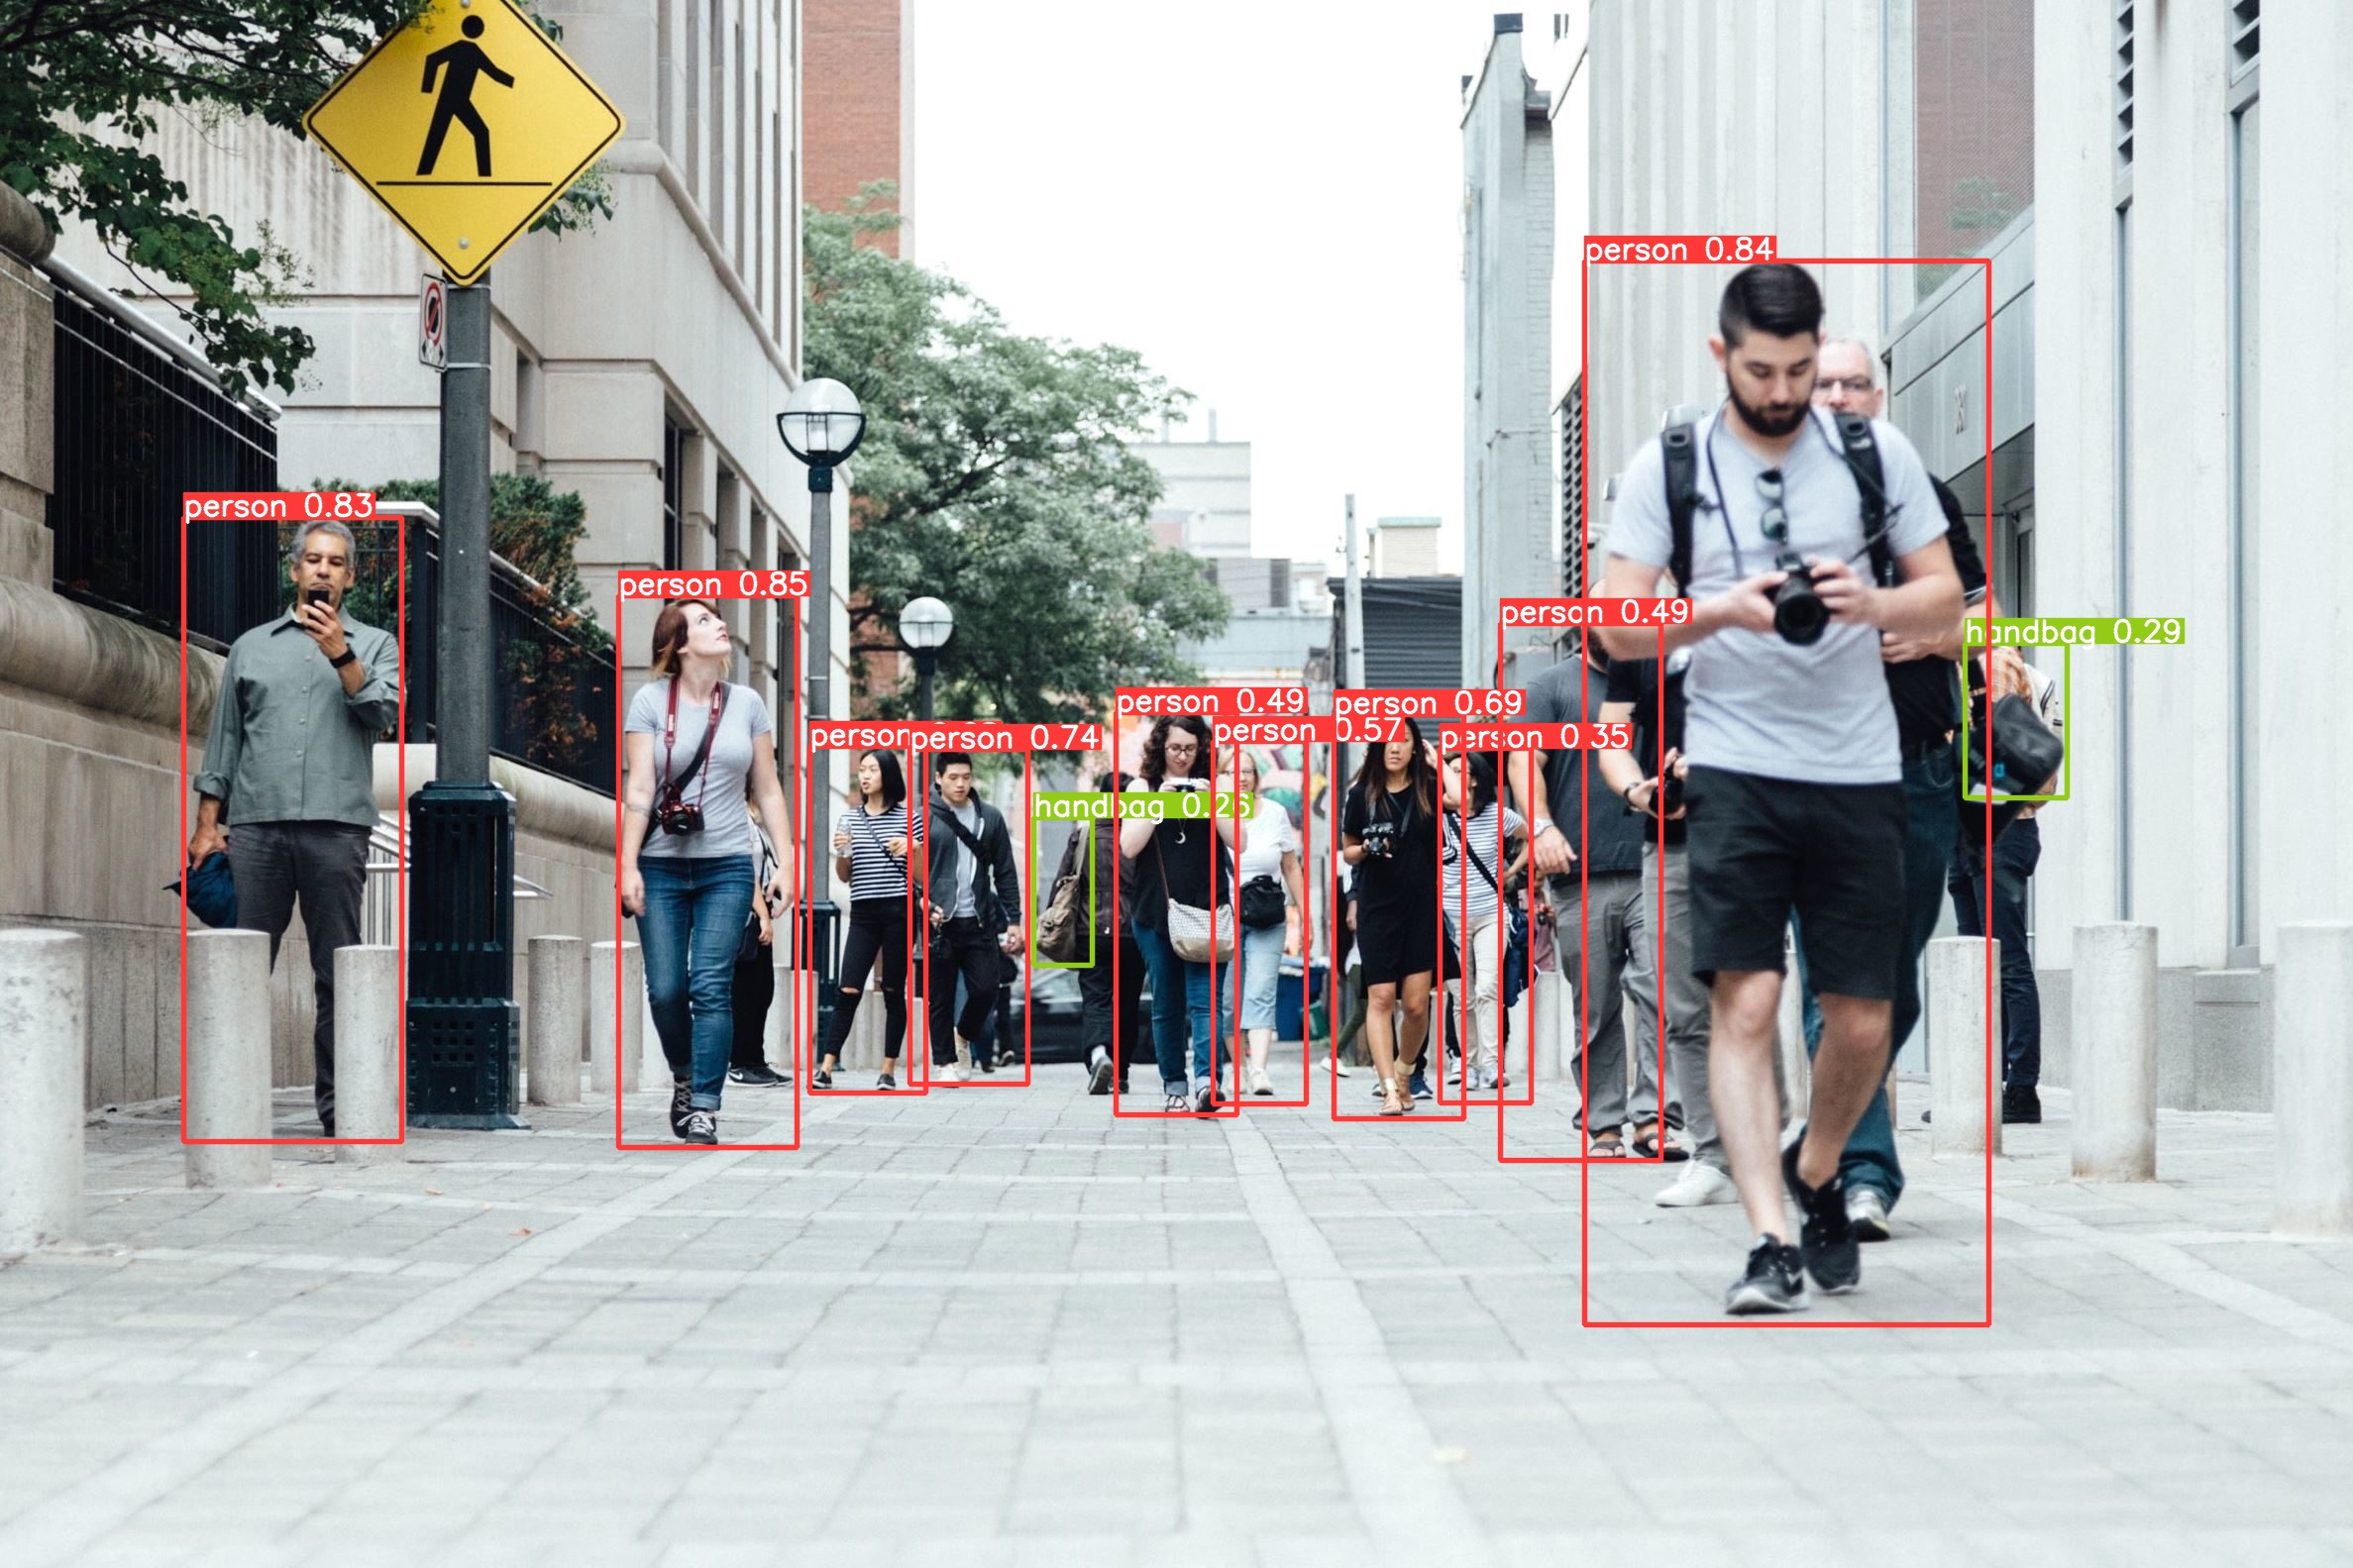

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/2017-04-10-07-10-35.jpg', height=600)

#### SDK (kit de desarrollo de software)

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://pixnio.com/free-images/2017/04/10/2017-04-10-07-10-35.jpg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://pixnio.com/free-images/2017/04/10/2017-04-10-07-10-35.jpg locally at 2017-04-10-07-10-35.jpg


In [9]:
results[0].boxes.xyxy

tensor([[ 624.,  601.,  804., 1158.],
        [1599.,  263., 2007., 1337.],
        [ 185.,  522.,  405., 1152.],
        [ 918.,  756., 1037., 1094.],
        [1346.,  721., 1477., 1129.],
        [ 817.,  753.,  934., 1103.],
        [1224.,  748., 1318., 1114.],
        [1514.,  629., 1676., 1171.],
        [1126.,  719., 1248., 1125.],
        [1453.,  755., 1545., 1113.],
        [1983.,  649., 2086.,  805.],
        [1043.,  825., 1102.,  974.]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.84735, 0.84340, 0.83211, 0.73597, 0.69036, 0.67558, 0.56973, 0.48831, 0.48758, 0.35080, 0.28871, 0.25821], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26., 26.], device='cuda:0')

## Conjunto de datos

Se recomienda ampliamente el uso de Roboflow. Enlace al dataset utilizado en este *notebook*:

https://universe.roboflow.com/roboflow-universe-projects/soccer-players-ckbru

## Preparar un conjunto de datos personalizado

Crear un conjunto de datos personalizado puede ser un proceso lento. Puede tomar docenas o incluso cientos de horas recopilar imágenes, etiquetarlas y exportarlas en el formato adecuado. Afortunadamente, Roboflow hace que este proceso sea lo más sencillo y rápido posible.

### Paso 1: Crear un proyecto

Antes de comenzar, se debe crear una [cuenta](https://app.roboflow.com/login) con Roboflow. Una vez hecho esto, se puede crear un nuevo proyecto dentro de la [interfaz](https://app.roboflow.com/) de Roboflow. Hay que tener en cuenta que se debe elegir el tipo de proyecto adecuado. A continuación un ejemplo:

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Paso 2: Cargar imágenes

A continuación se agregan los datos al proyecto recién creado. Esto se puede realizar a través de API o a través de la [plataforma](https://docs.roboflow.com/adding-data/object-detection).

Si se arrastra y suelta un directorio con un conjunto de datos en un formato compatible, la interfaz de Roboflow cargará automáticamente las imágenes y las etiquetas juntas.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Paso 3: Etiquetado

Si solo se cuenta con imágenes (no etiquetadas), se puede etiquetar directamente en el apartado de [anotaciones](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Paso 4: Generar una nueva versión del conjunto de datos

Ahora que se han añadido las imágenes y sus etiquetas, se puede generar una nueva versión del conjunto de datos. Al generar una versión, se puede optar por agregar preprocesamiento y aumentación de datos. Este paso es opcional, sin embargo, puede permitir mejorar significativamente la robustez del modelo.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Paso 5: Exportar el conjunto de datos

Una vez que se genera una versión del conjunto de datos, éste puede ser cargado directamente en Google Colab para facilitar el entrenamiento, haciendo clic en "Exportar" y seleccionando el formato de conjunto de datos adecuado para el modelo.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("yolo-v8-oefpj").project("yolov8-object-detection-t66wl")
dataset = project.version(1).download("yolov8")

/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=a0019d95ede181c818ddbf1d95760e30fb1d7377b964ea6b1b77305a7e2dc1fe
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Yolov8-Object-Detection-1 in yolov8:: 100%|██████████| 460/460 [00:00<00:00, 2184.75it/s]


### Entrenamiento personalizado

In [ ]:
%%time
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 248MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Yolov8-Object-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

### Evaluación

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch180.jpg
events.out.tfevents.1675803664.636ddb601334.9002.0  train_batch181.jpg
F1_curve.png					    train_batch182.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


/content


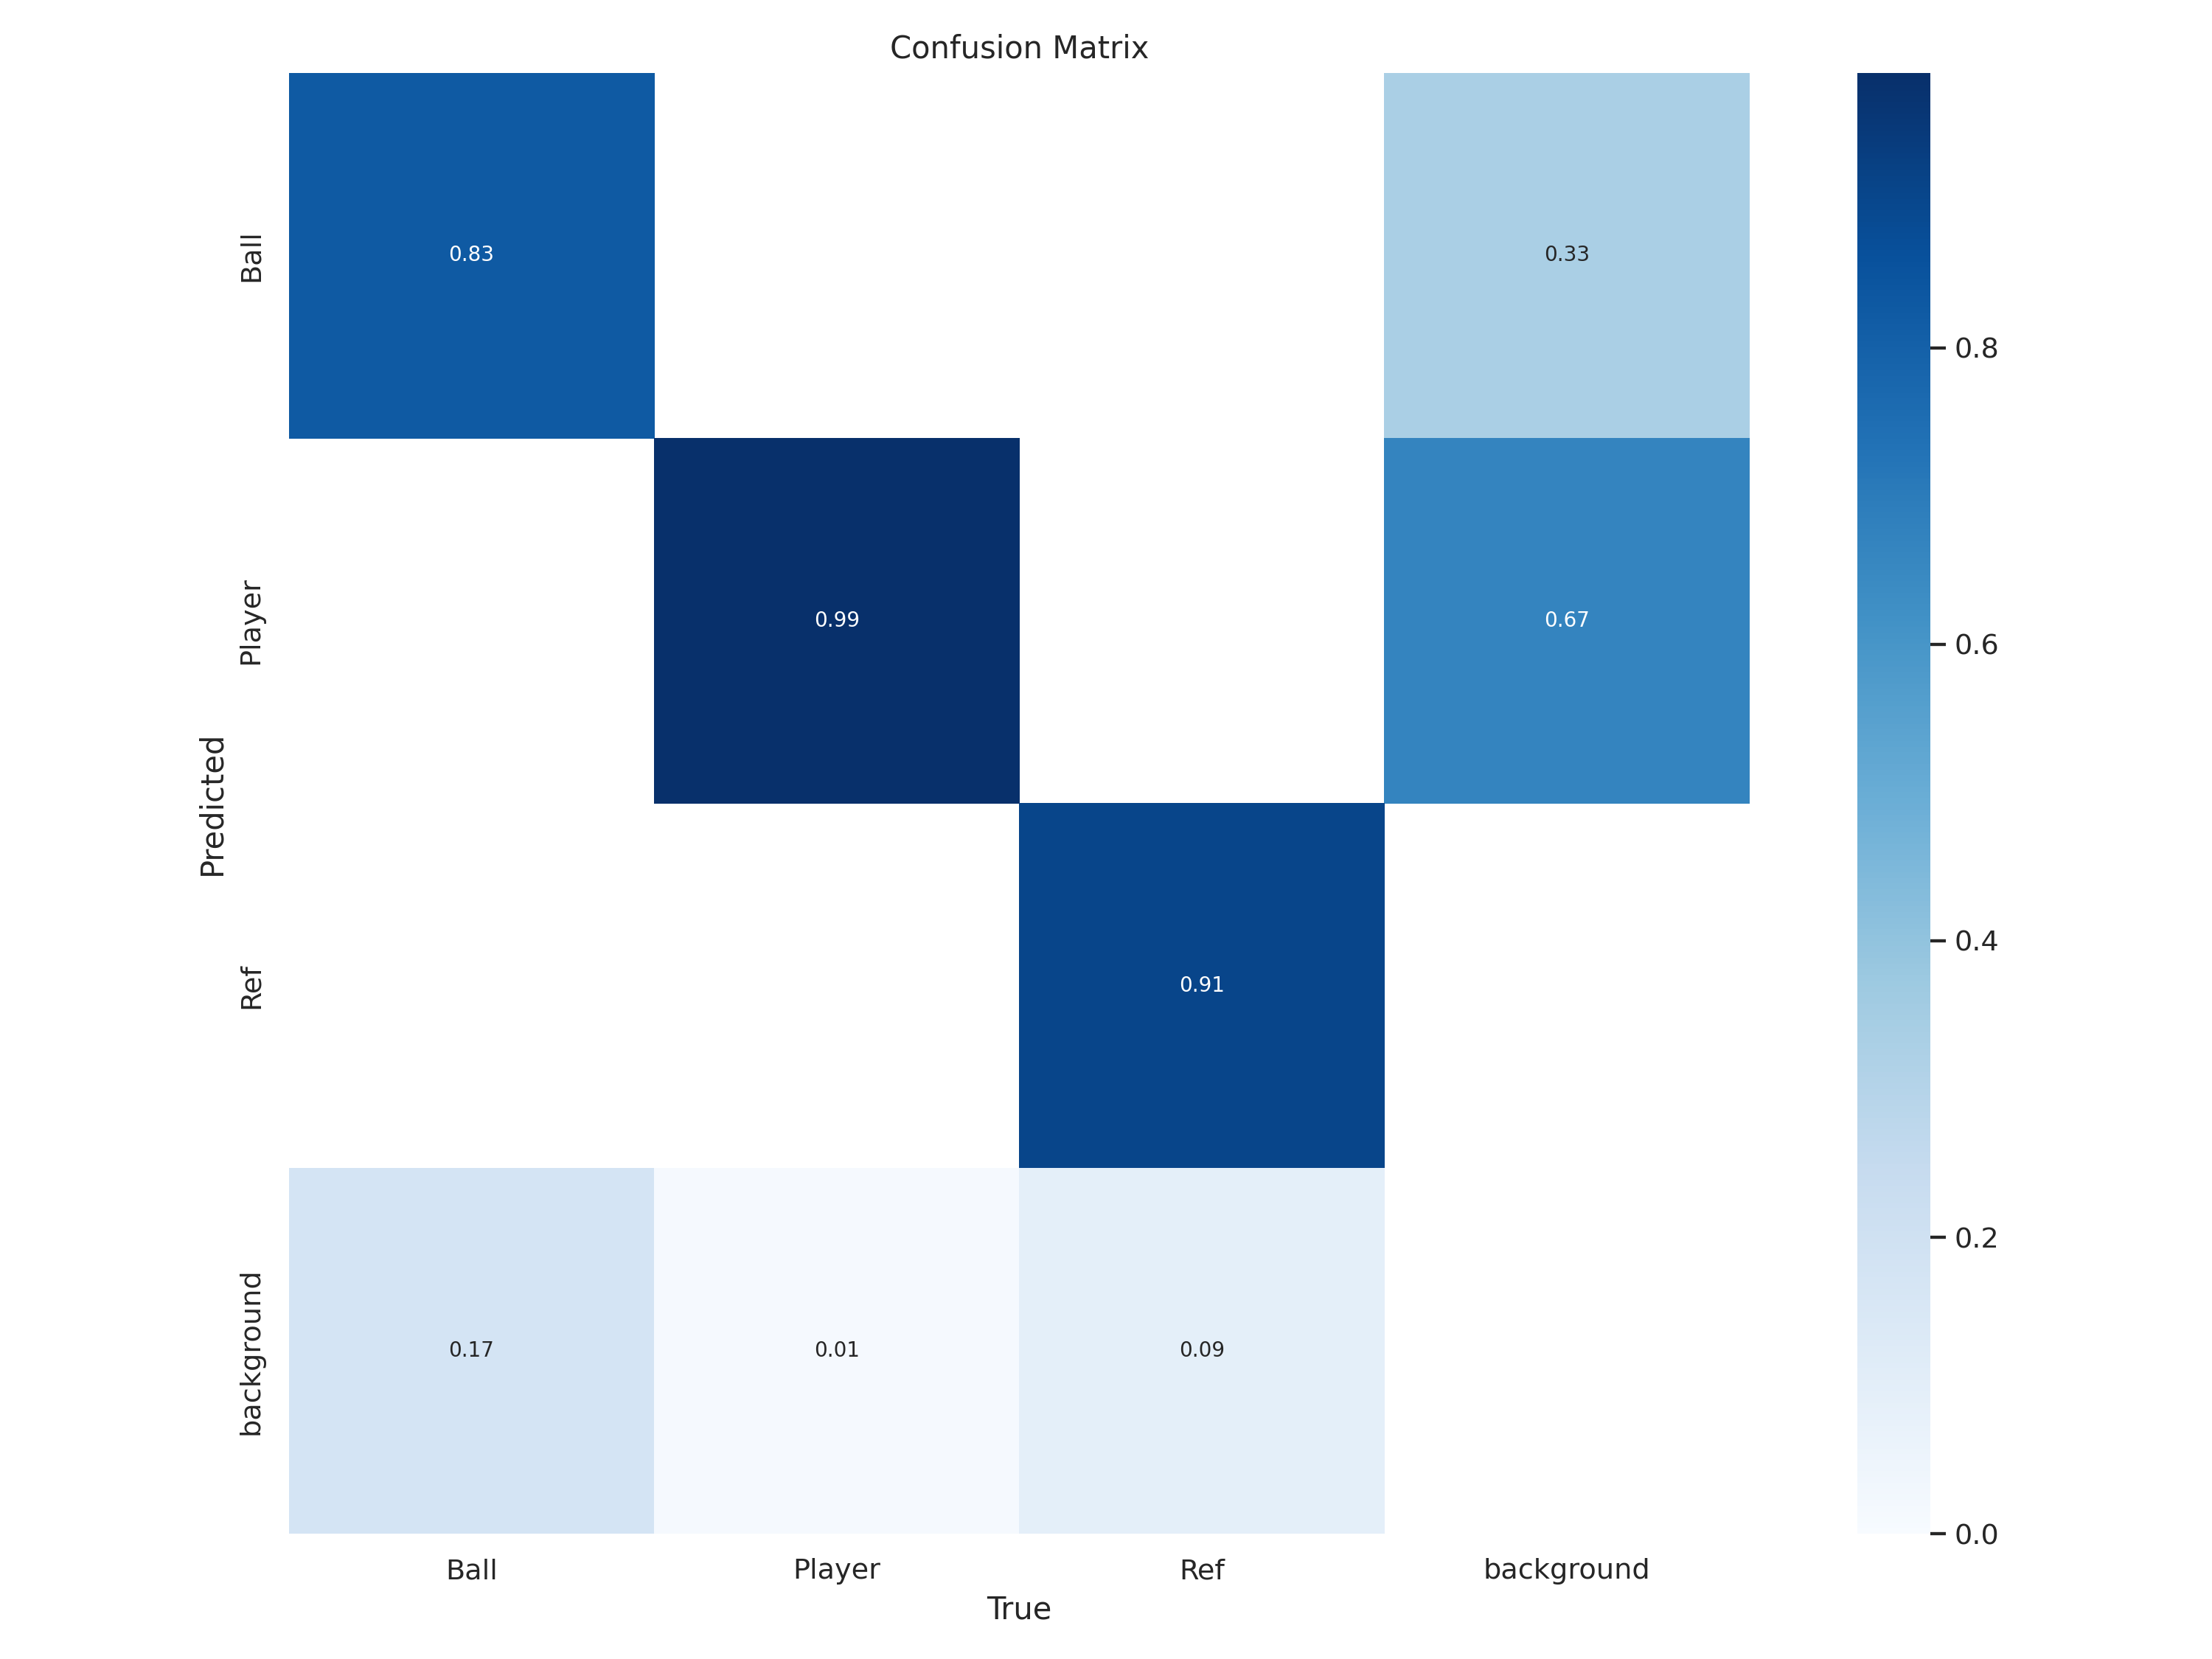

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


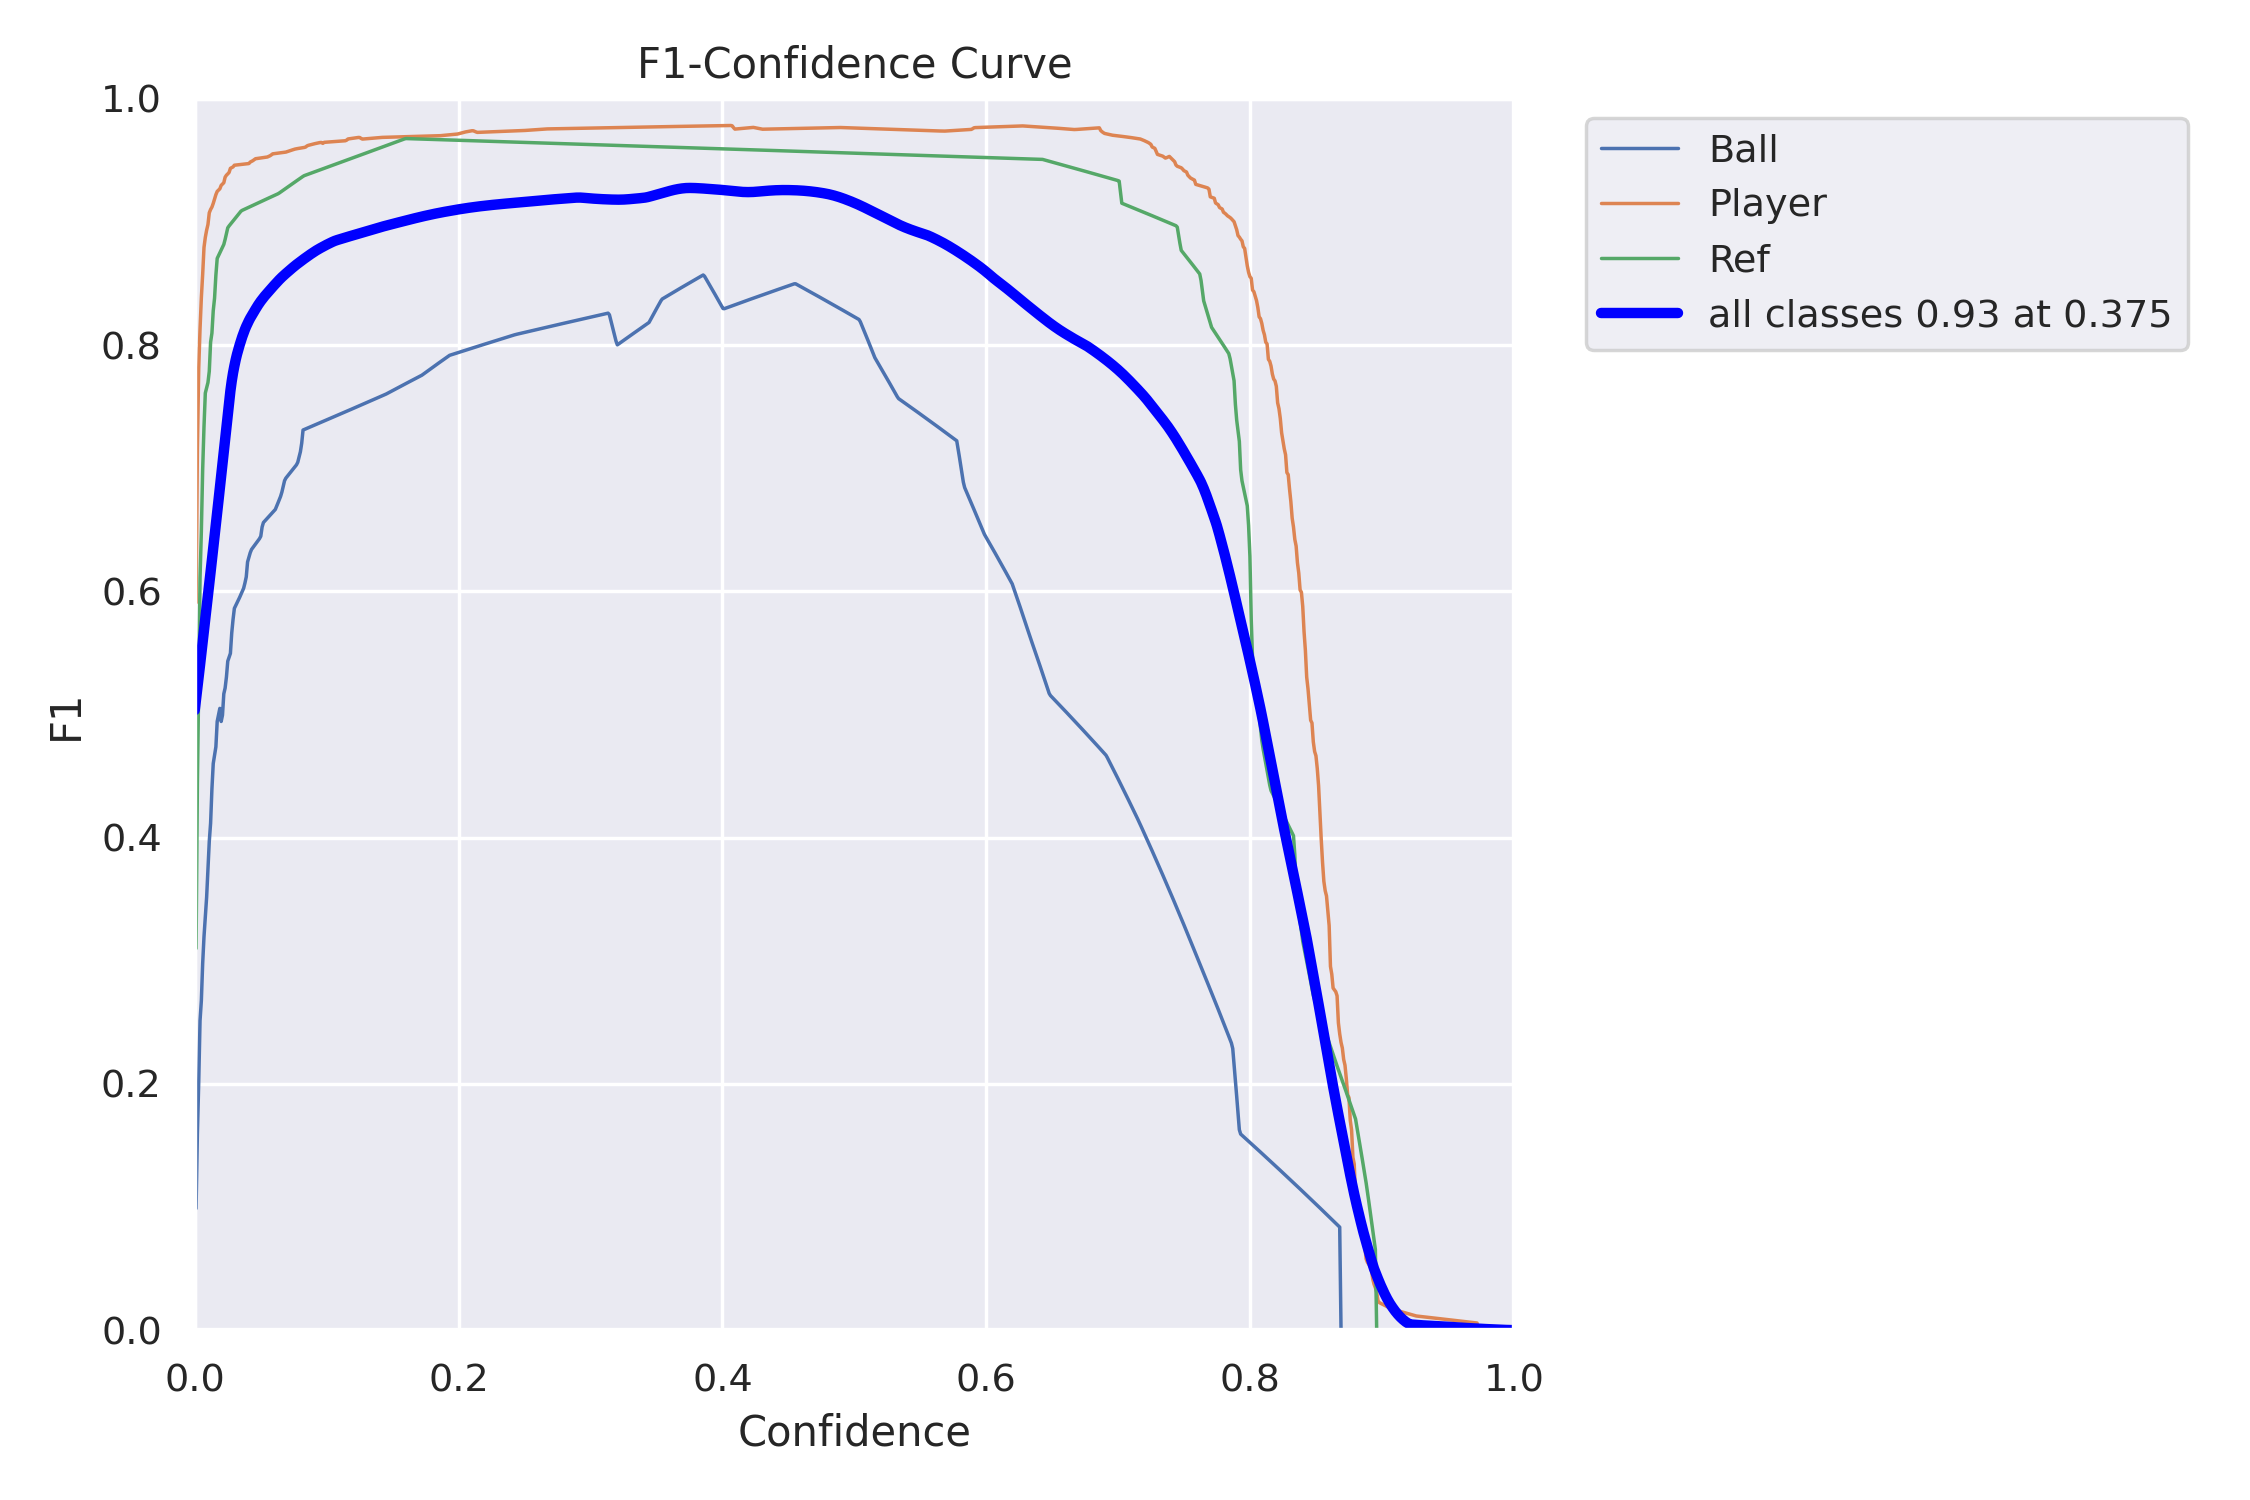

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


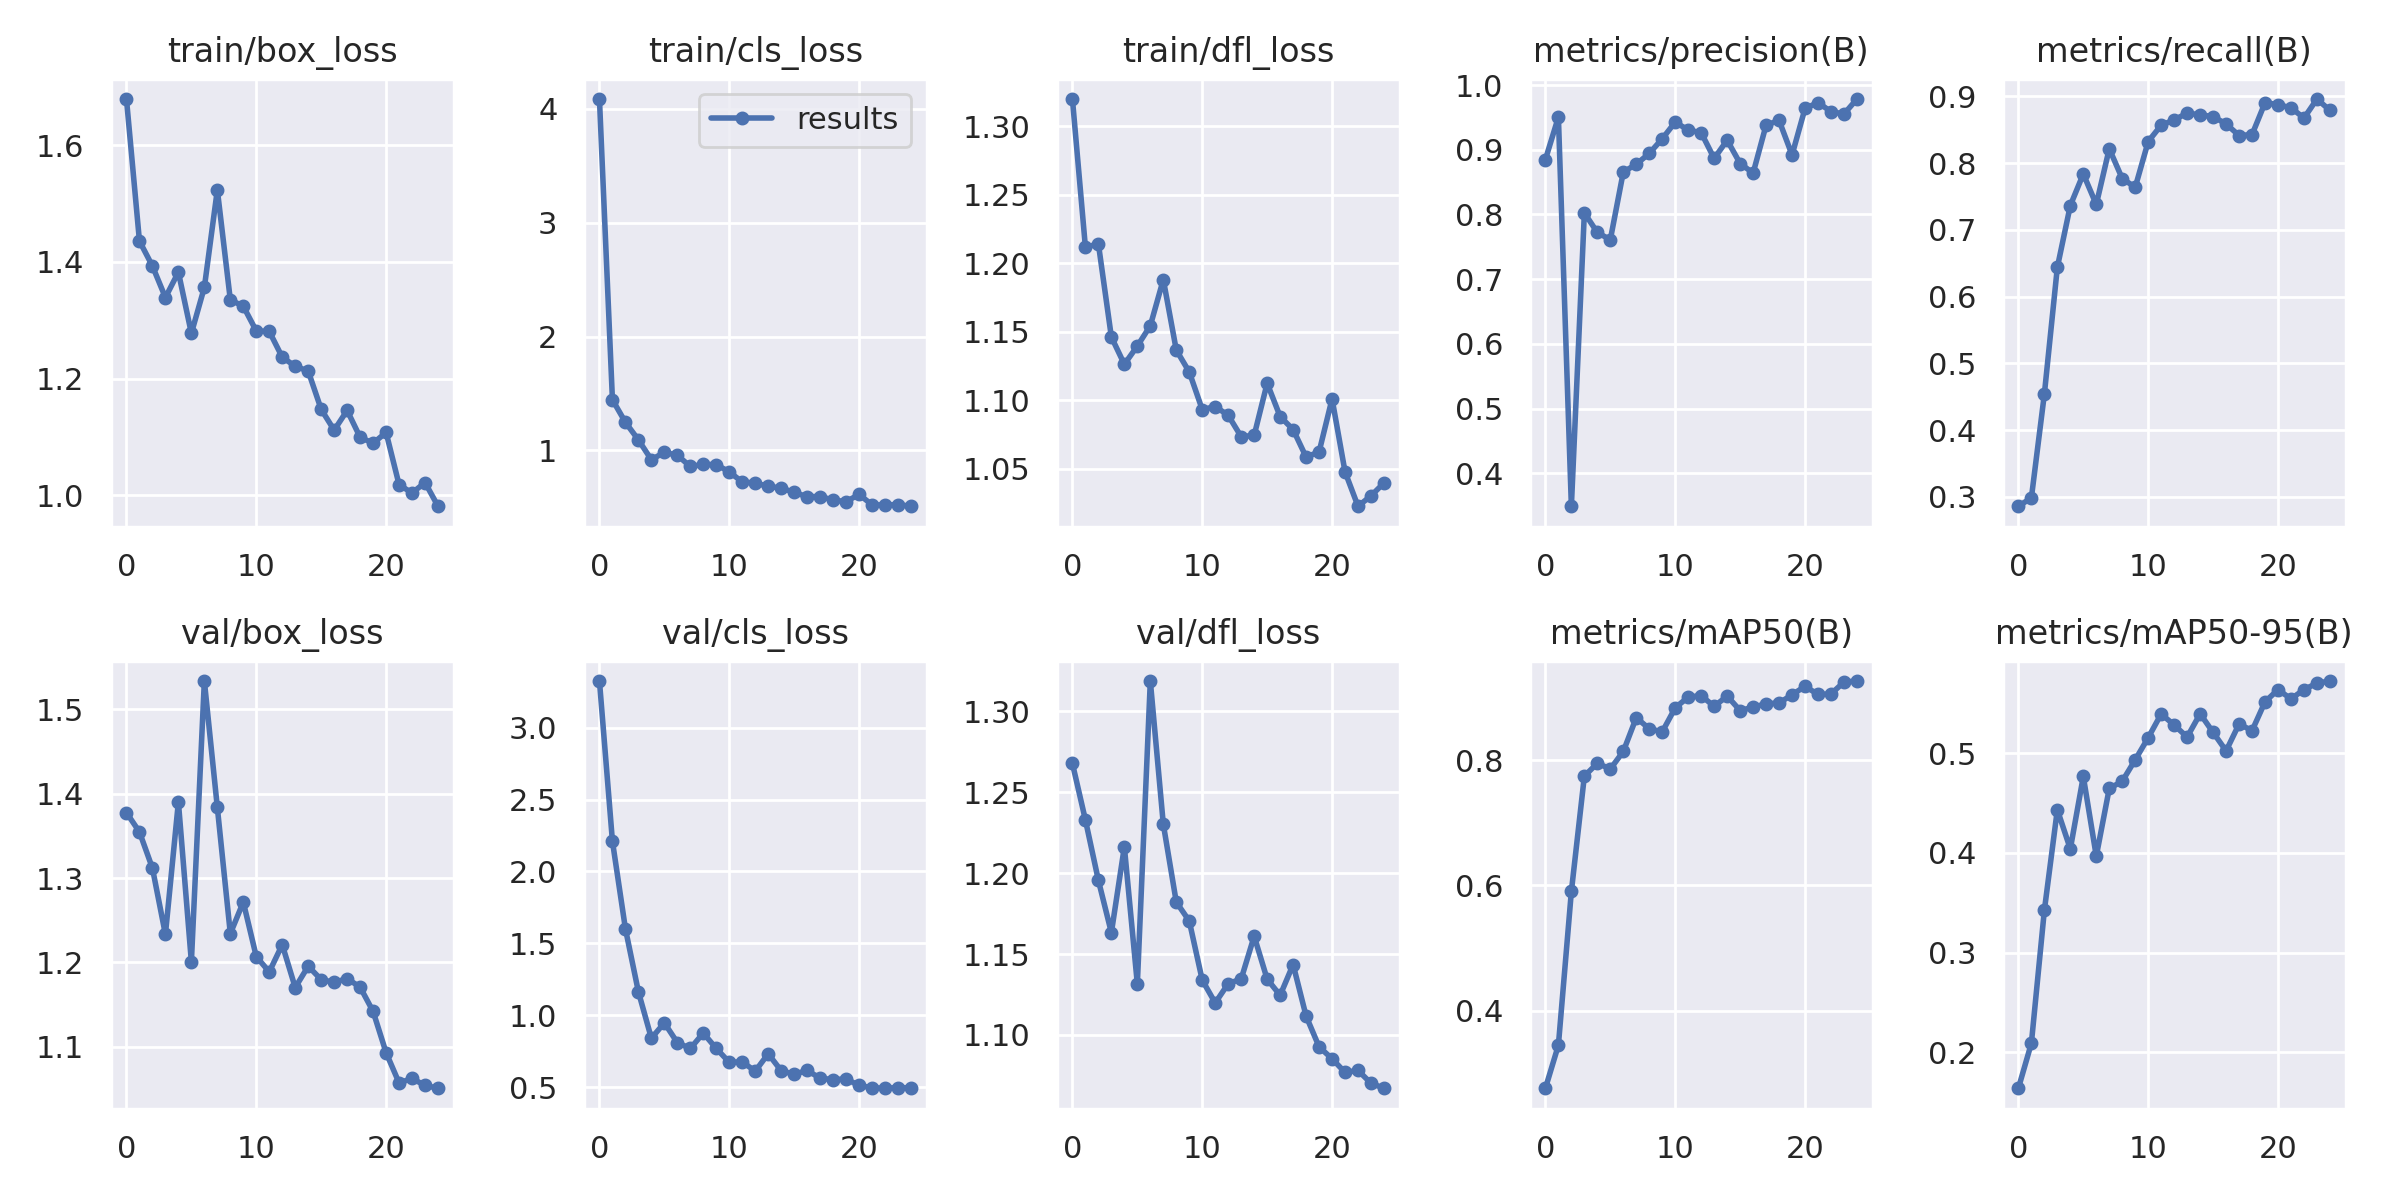

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

### Validaciones

/content


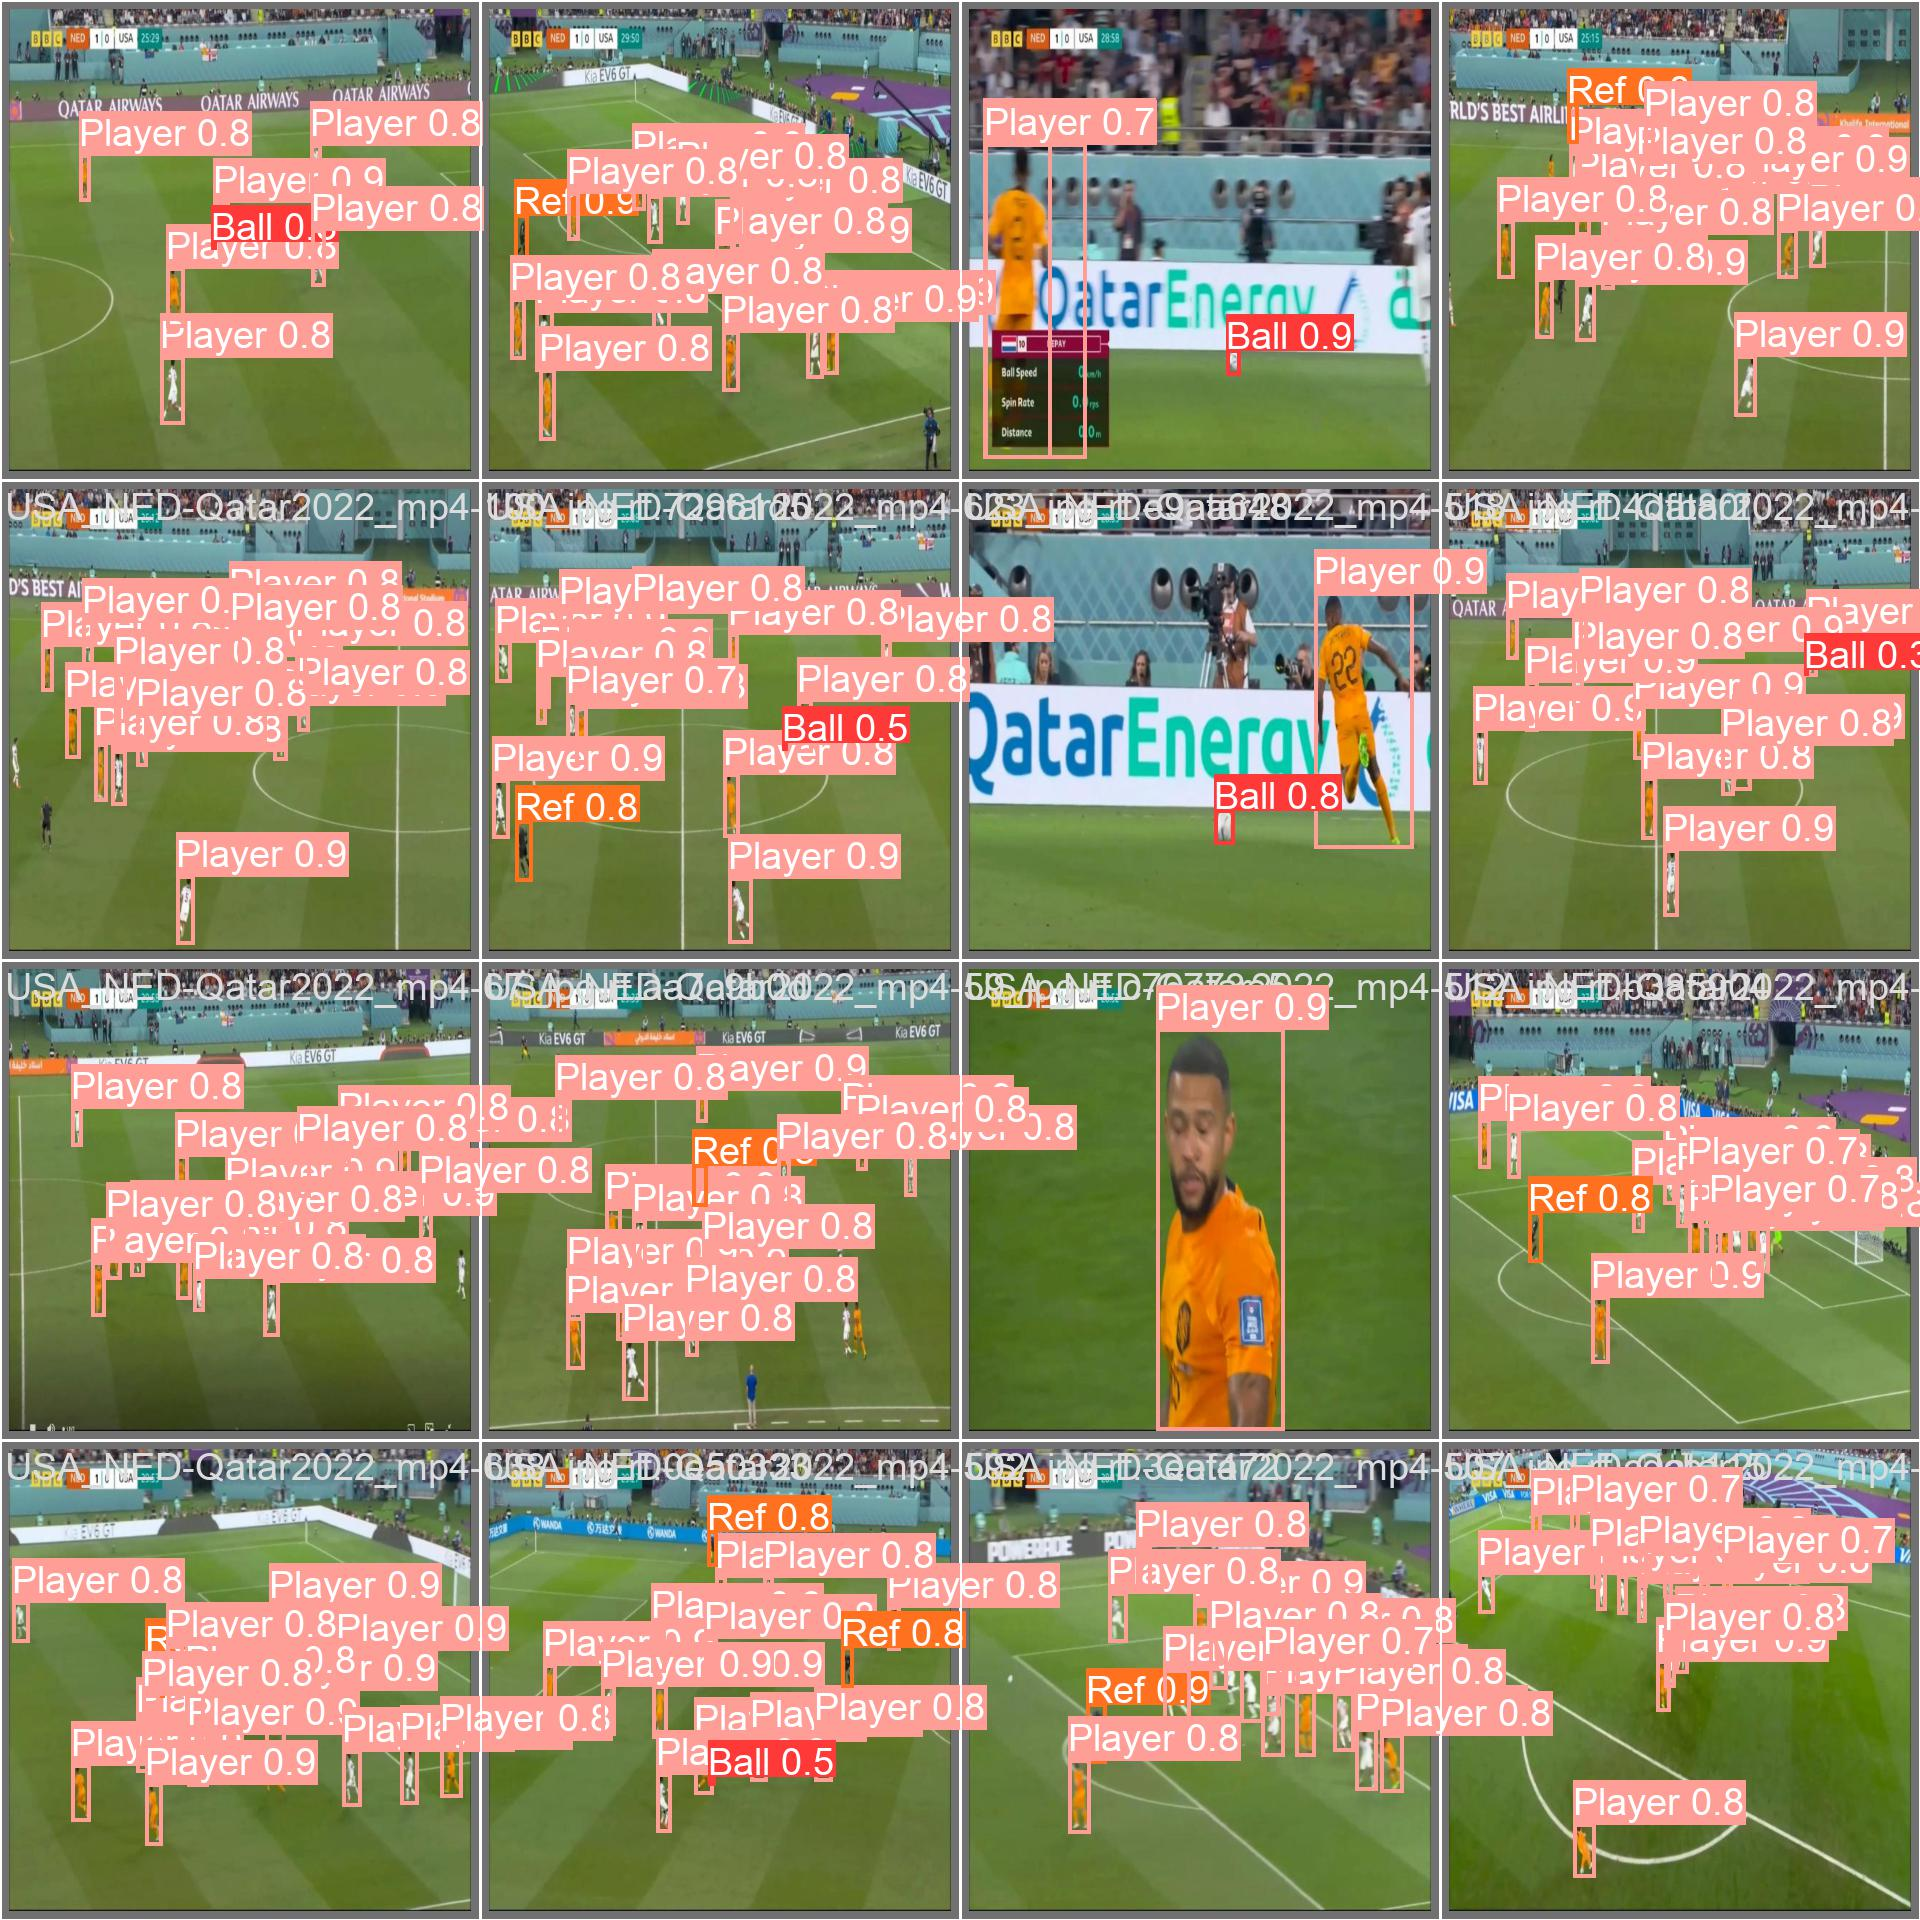

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Yolov8-Object-Detection-1/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100% 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.07s/it]
                   all         27        401      0.974      0.873      0.926      0.571
                  Ball         27         23       0.96      0.739      0.839      0.389
                Player         27        346      0.978      0.974      0.992      0.715
                   Ref         27         32      0.983      0.906      0.945       0.61
Speed: 0.3ms pre-process, 19.8ms inference, 0.0ms loss, 1.6ms post-process per image


### Inferencia

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/19 /content/datasets/Yolov8-Object-Detection-1/test/images/USA_NED-Qatar2022_mp4-138_jpg.rf.a2ffd69d8c2cab6f7437723beaebab57.jpg: 800x800 1 Ball, 15 Players, 26.1ms
image 2/19 /content/datasets/Yolov8-Object-Detection-1/test/images/USA_NED-Qatar2022_mp4-143_jpg.rf.fcde77cbf928028e770a415554d95a9e.jpg: 800x800 17 Players, 2 Refs, 26.2ms
image 3/19 /content/datasets/Yolov8-Object-Detection-1/test/images/USA_NED-Qatar2022_mp4-205_jpg.rf.a5199886584ac4bf0f6715dd933a2184.jpg: 800x800 8 Players, 26.1ms
image 4/19 /content/datasets/Yolov8-Object-Detection-1/test/images/USA_NED-Qatar2022_mp4-20_jpg.rf.bc7275f6cb14e7c52c5d76334ed533d0.jpg: 800x800 1 Ball, 8 Players, 25.2ms
image 5/19 /content/datasets/Yolov8-Object-Detection-1/test/images/USA_NED-Qatar2022_mp4-257_jpg.rf.16c8f5b02c750cc56c8bc5c9e3504d2b.jpg: 800x

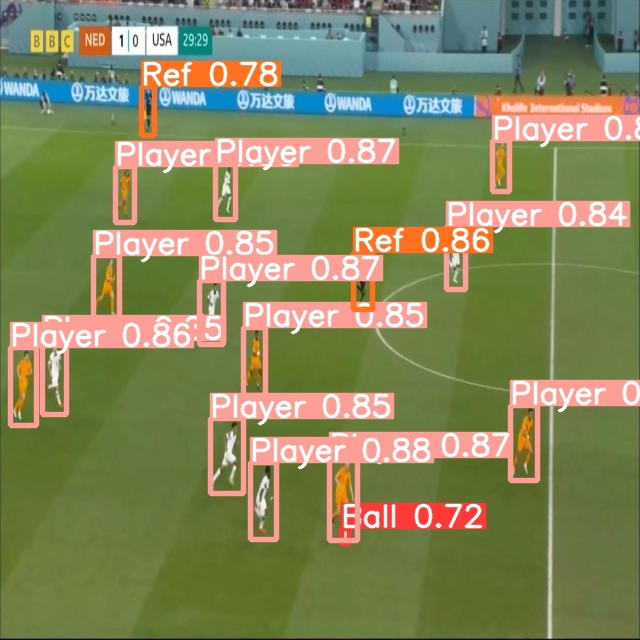

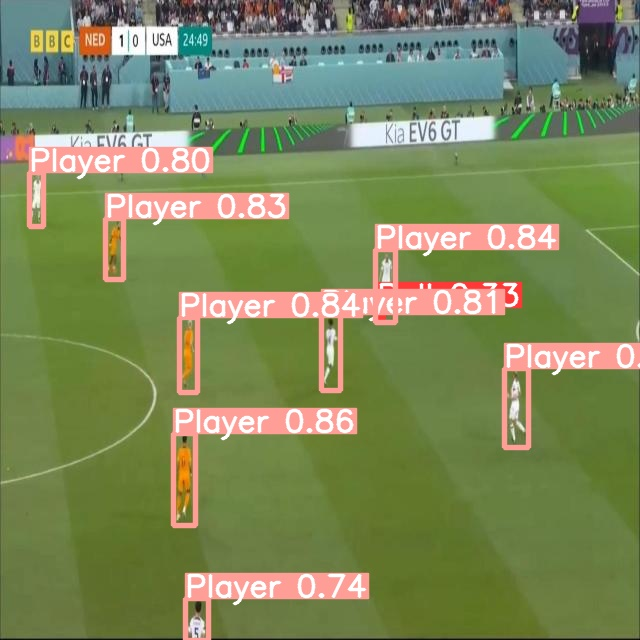

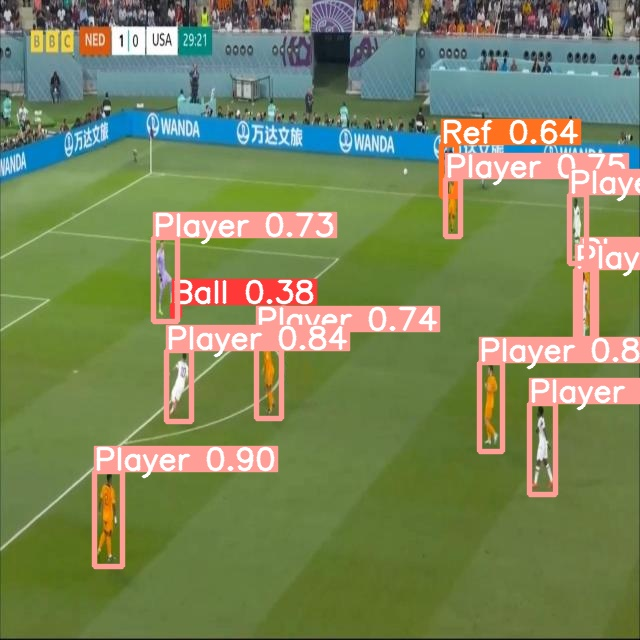

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=500, height=400))
      print("\n")

**Referencias**

* https://paperswithcode.com/task/object-recognition
* https://github.com/roboflow/notebooks
* https://universe.roboflow.com/
* https://docs.ultralytics.com/python/
* https://arxiv.org/abs/1506.02640